# 26회차 기출문제

## 문제 1

**Data description**

-   **Invoice_no** : 송장번호

-   **Stock_code** : 제품코드

-   **Stock_category** : 제품 분류

-   **Quantity** : 수량

-   **Invoice_date** : 주문일자

-   **Unit_price** : 단가

-   **Customer_id** : 고객번호

-   **Country** : 국가

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn import set_config
set_config(display="diagram")
import koreanize_matplotlib

In [2]:
dat = pd.read_csv('problem1.csv')
dat.head()

,InvoiceNo,StockCode,StockCategory,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,537676,22567,20 DOLLY PEGS RETROSPOT,24.0,12/8/2010 9:53,1.25,12386,Australia
1,537676,22915,ASSORTED BOTTLE TOP MAGNETS,120.0,12/8/2010 9:53,0.36,12386,Australia
2,537676,22926,IVORY GIANT GARDEN THERMOMETER,12.0,12/8/2010 9:53,5.95,12386,Australia
3,537676,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,24.0,12/8/2010 9:53,1.25,12386,Australia
4,537676,21906,PHARMACIE FIRST AID TIN,4.0,12/8/2010 9:53,6.75,12386,Australia


1.  **결측치 처리하시오.**

In [3]:
dat.isnull().sum()

InvoiceNo         0
StockCode         0
StockCategory     0
Quantity         16
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

quantity 변수에 결측치 16개 존재한다.

먼저 year, month, day에 관한 날짜변수를 생성한다.

In [4]:
dat = dat.astype({'InvoiceDate' : 'datetime64[ns]', 'CustomerID' : 'object'})
dat['year'] = dat['InvoiceDate'].dt.year
dat['month'] = dat['InvoiceDate'].dt.month
dat['day'] = dat['InvoiceDate'].dt.day

결측치 대치를 위해 고객별 하루동안 구매한 quantity의 평균값을 산출한다.



In [5]:
mean_q = dat.groupby(['CustomerID', 'year', 'month', 'day']).agg(mean1 = ('Quantity', 'mean')).round(0).reset_index()
mean_q.head(2)

,CustomerID,year,month,day,mean1
0,12347,2010,12,7,10.0
1,12347,2011,1,26,11.0


In [6]:
dat = pd.merge(dat, mean_q, left_on = ["CustomerID", "year", "month", "day"], right_on = ["CustomerID", "year", "month", "day"], how = 'left')

특정 고객이 해당 제품을 몇 개를 살지 유추하기 어려우므로, 특정 고객이 그 날에 구매한 제품 quantity의 평균으로 결측치를 대치한

In [7]:
import warnings
warnings.filterwarnings('ignore')
dat['Quantity'][dat['Quantity'].isna()] = dat['mean1'][dat['Quantity'].isna()]

날짜 변수, 고객별 하루동안 구매한 quantity의 평균값은 제거한다.



In [8]:
dat = dat.drop(['mean1', 'year', 'month', 'day'], axis = 1)

In [9]:
dat.isna().sum()

InvoiceNo        0
StockCode        0
StockCategory    0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

결측치가 대치된 것을 확인할 수 있다.



2.  **고객 데이터를 활용하여 군집분석을 수행하려고 한다. 군집분석 수행 전에 이상치를 제거하려고 한다. 이상치를 제거하는 방법을 설명하고, 이상치를 제거한 후 이상치가 모두 제거되었다는 통계 자료를 제시하시오.**

In [10]:
dat.describe()

,Quantity,UnitPrice
count,44416.000000,44416.000000
mean,20.158704,5.135913
std,48.147072,57.720402
min,-624.000000,0.000000
25%,4.000000,1.250000
50%,10.000000,1.950000
75%,16.000000,3.750000
max,2400.000000,4161.060000


quantity가 0 이하인 값이 존재한다. quantity가 음수의 값이 나올 수 없으므로 이상치로 판단하고 제거한다.

unit price가 0인 값이 존재한다.

In [11]:
dat.loc[dat.UnitPrice == 0, ['StockCode', 'StockCategory']]

,StockCode,StockCategory
452,22619,SET OF 6 SOLDIER SKITTLES
923,23234,BISCUIT TIN VINTAGE CHRISTMAS
1188,22385,JUMBO BAG SPACEBOY DESIGN
7612,22423,REGENCY CAKESTAND 3 TIER
9938,23157,SET OF 6 NATIVITY MAGNETS
14182,M,Manual
27312,M,Manual
29220,22841,ROUND CAKE TIN VINTAGE GREEN
35511,23270,SET OF 2 CERAMIC PAINTED HEARTS
35512,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER


In [12]:
dat.loc[dat.StockCode == '22619', ['StockCode', 'StockCategory', 'UnitPrice']]

,StockCode,StockCategory,UnitPrice
111,22619,SET OF 6 SOLDIER SKITTLES,3.75
150,22619,SET OF 6 SOLDIER SKITTLES,3.75
200,22619,SET OF 6 SOLDIER SKITTLES,3.39
365,22619,SET OF 6 SOLDIER SKITTLES,3.39
440,22619,SET OF 6 SOLDIER SKITTLES,3.39
452,22619,SET OF 6 SOLDIER SKITTLES,0.00
796,22619,SET OF 6 SOLDIER SKITTLES,3.39
2063,22619,SET OF 6 SOLDIER SKITTLES,3.75
2899,22619,SET OF 6 SOLDIER SKITTLES,3.75
3920,22619,SET OF 6 SOLDIER SKITTLES,3.75


제품코드, 제품분류가 같아도 단가가 다른 경우가 존재한다. unit price가 0인 경우는 사은품으로 증정해주는 경우를 생각해볼 수 있으므로, 이상치로 판단하지 않고 분석에 활용한다.

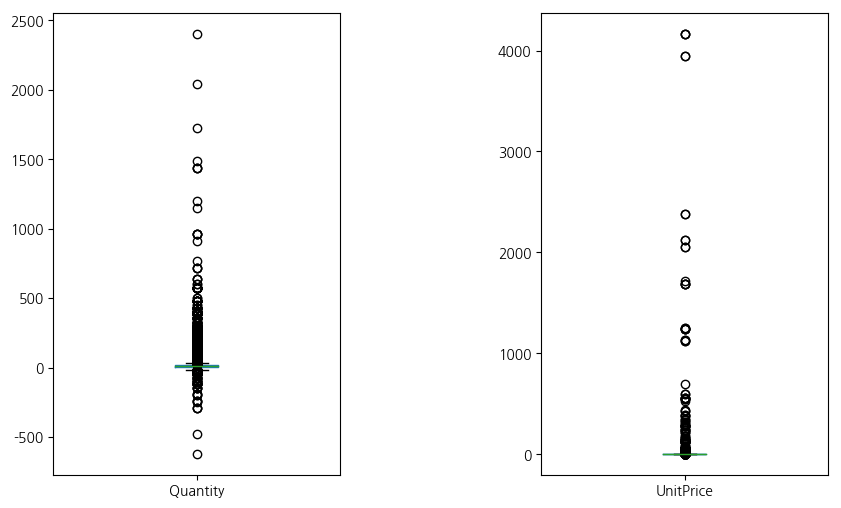

In [13]:
dat.loc[:, ['Quantity', 'UnitPrice']].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
);

plt.subplots_adjust(wspace=0.7);
plt.show();

In [14]:
Q1 = np.quantile(dat['Quantity'], 0.25)
Q3 = np.quantile(dat['Quantity'], 0.75)
IQR = Q3 - Q1

UC = Q3 + (1.5 * IQR) 
LC = Q3 - (1.5 * IQR) 

dat.loc[(dat.Quantity > UC), "Quantity"].describe()

count    5056.000000
mean      103.483188
std       108.429197
min        36.000000
25%        48.000000
50%        72.000000
75%       120.000000
max      2400.000000
Name: Quantity, dtype: float64

In [15]:
Q1 = np.quantile(dat['UnitPrice'], 0.25)
Q3 = np.quantile(dat['UnitPrice'], 0.75)
IQR = Q3 - Q1

UC = Q3 + (1.5 * IQR) 
LC = Q3 - (1.5 * IQR) 

dat.loc[(dat.UnitPrice > UC), "UnitPrice"].describe()

count    5458.000000
mean       26.557292
std       163.024353
min         7.650000
25%         8.500000
50%         9.950000
75%        16.950000
max      4161.060000
Name: UnitPrice, dtype: float64

다음으로 이상치 탐지 방법으로 상자 수염 그림을 이용해보고자 한다. 상자그림에서 이상치는 울타리를 기준으로 이상치를 판단하는데, 위 울타리는 제3사분위수 + 1.5xIQR, 아래 울타리는 제 1사분위수 - 1.5xIQR로 정의된다. 울타리를 기준으로 이상치를 탐색해보면 분포의 치우침으로 인해서 너무 많은 관측치가 이상치로 탐지되는 것을 확인할 수 있다.

단순히 이상치를 생각해보았을 때, unit price, quantity 값이 큰 관측치의 경우 충성고객 or 우량 고객일 가능성이 높다. 따라서 상자그림을 통해 이상치는 제거하지 않고, quantity < 0인 관측치만 이상치로 분류한 후 제거한다.

In [16]:
dat = dat.loc[dat.Quantity > 0, :]
dat.Quantity.describe()

count    43156.000000
mean        21.035638
std         48.198779
min          1.000000
25%          6.000000
50%         12.000000
75%         18.000000
max       2400.000000
Name: Quantity, dtype: float64

quantity < 0인 이상치가 제거된 것을 확인할 수 있다.



3.  **kmeans 또는 DBSCAN 등의 기법을 활용하여 군집을 생성하시오.**

In [17]:
# 고객별 총 거래 빈도(new_f)에 관한 파생변수를 생성한다.
new_f = dat.groupby(['CustomerID']).agg(new_f = ('CustomerID', 'count')).reset_index()
# 고객별 총 구매액(new_m)에 관한 파생변수를 생성한다.
new_m = dat.assign(t_price = lambda x: x.UnitPrice*x.Quantity).groupby(['CustomerID']).agg(new_m = ('t_price', 'sum')).reset_index()

# 군집분석을 위한 최종 데이터는 다음과 같다.
dat2 = pd.merge(new_f, new_m, left_on = 'CustomerID', right_on = 'CustomerID', how = 'inner')
dat2 = dat2.astype({'CustomerID' : 'object'})
dat2.head()

,CustomerID,new_f,new_m
0,12347,182,4310.00
1,12348,31,1797.24
2,12349,73,1757.55
3,12350,17,334.40
4,12352,85,2506.04


K-means 군집분석을 실시한다. k-means 군집분석을 실시하기 전 변수 간 스케일을 통일하고, 각 변수의 중요도를 균든하게 반영하기 위해 표준화를 진행한다.

In [18]:
from sklearn.preprocessing import StandardScaler
numeric_data = dat2.select_dtypes('number')
stdscaler = StandardScaler()
numeric_df = pd.DataFrame(stdscaler.fit_transform(numeric_data), columns = numeric_data.columns)
numeric_df.head(2)

,new_f,new_m
0,0.242606,0.023383
1,-0.234756,-0.118031


적절한 군집의 수를 정하기 위해 실루엣 계수를 활용한다.



In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for i in range(2,10):
    fit_kmeans = KMeans(n_clusters=i, init='random', n_init = 10, random_state=0).fit(numeric_df)
    score = silhouette_score(numeric_df, fit_kmeans.labels_)
    scores.append(score)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, score))

For n_clusters=2, the silhouette score is 0.9639191618105983
For n_clusters=3, the silhouette score is 0.7251022158137324
For n_clusters=4, the silhouette score is 0.5975615379076885
For n_clusters=5, the silhouette score is 0.5994298150983463
For n_clusters=6, the silhouette score is 0.5459473765982441
For n_clusters=7, the silhouette score is 0.5218054091630446
For n_clusters=8, the silhouette score is 0.4915640209536934
For n_clusters=9, the silhouette score is 0.46717873003782057


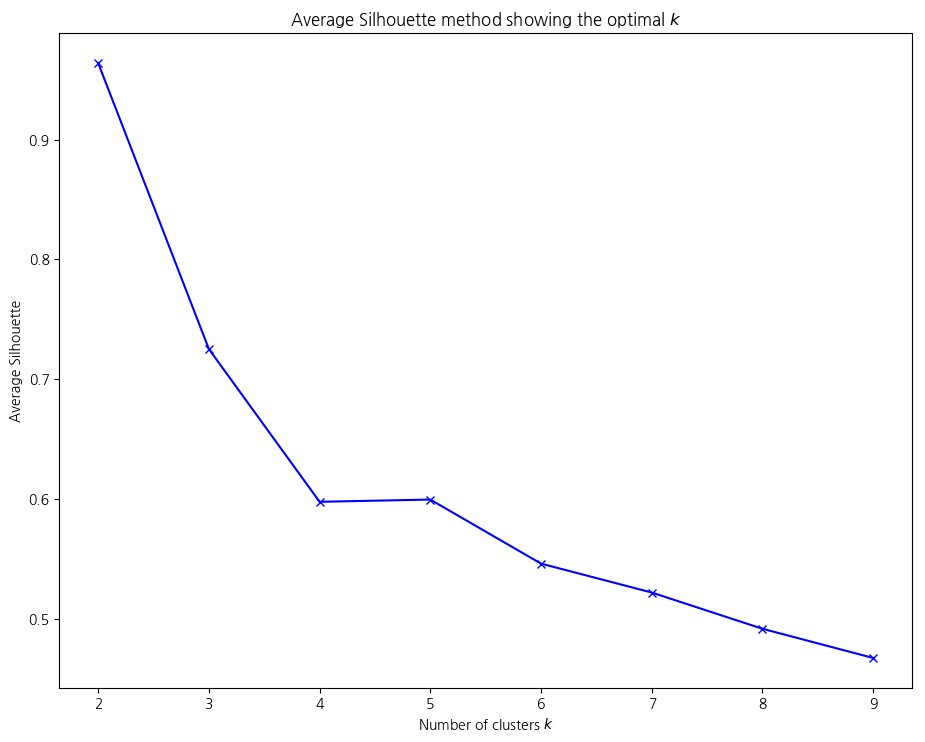

In [20]:
plt.figure(figsize=(11,8.5));
plt.plot(range(2,10), np.array(scores), 'bx-');
plt.xlabel('Number of clusters $k$');
plt.ylabel('Average Silhouette');
plt.title('Average Silhouette method showing the optimal $k$');
plt.show();

실루엣 계수로 구한 최적 군집의 수(k)는 2이다.

In [21]:
kmeans = KMeans(n_clusters = 2, random_state=0)
kmeans.fit(numeric_df)

KMeans(n_clusters=2, random_state=0)

dbscan의 경우 군집의 수를 사전에 지정할 수 없다. 군집결과를 해석하여 고객군을 분류하는 것이 목적이므로, 사전에 군집의 수를 적절하게 정할 수 있는 k-means 군집분석을 실시하였다.

4.  **생성된 군집에 대하여 군집성능지표를 산출하고, 군집간 차이와 특성을 분석한 결과를 제시하시오.**

Average silhouette method를 통해 응집도, 분리도 측면에서 최적의 k를 선택하고자 한다. Average silhouette method는 각 
별 평균 silhouette coefficient를 계산하고, 평균 silhouette coefficient값이 가장 큰 
를 선택하는 방법이다. 개별 관측치의 silhouette coefficient는 seperation, compactness를 동시에 고려하여 정의된다. k = 2일 때, Average silhouette coefficient = 0.9 이상으로 가장 높은 것을 확인할 수 있다.

In [22]:
label = kmeans.labels_
dat2['cluster'] = label

dat2['cluster'].value_counts()

0    408
1      2
Name: cluster, dtype: int64

0번 군집에 406명, 1번 군집에 4명이 묶인 것을 확인할 수 있다.



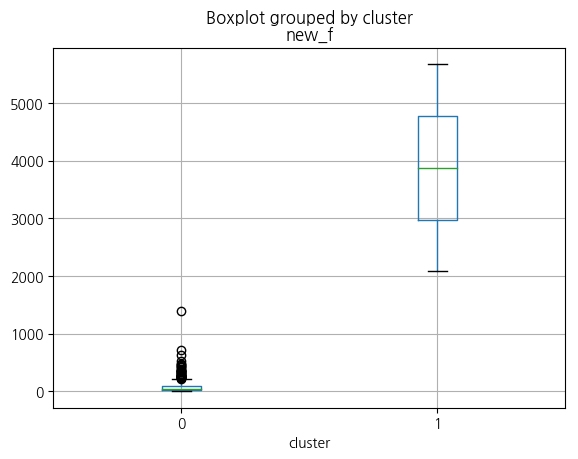

In [23]:
dat2.boxplot(column = ['new_f'], by = 'cluster');
plt.show();

In [24]:
pd.options.display.max_columns = None 
dat2.groupby(['cluster'])['new_f'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,408.0,86.762255,120.817688,1.0,21.75,45.0,101.50,1400.0
1,2.0,3878.500000,2543.463092,2080.0,2979.25,3878.5,4777.75,5677.0


고객별 총 거래빈도가 높은 군집은 1번 군집이다.

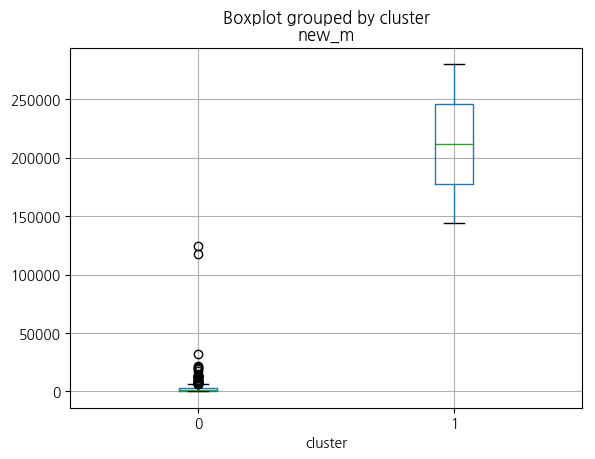

In [25]:
dat2.boxplot(column = ['new_m'], by = 'cluster');
plt.show();

In [26]:
dat2.groupby(['cluster'])['new_m'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,408.0,2874.317206,9017.627930,51.56,460.15,1031.995,2715.885,124798.53
1,2.0,212015.540000,96435.901641,143825.06,177920.30,212015.540,246110.780,280206.02


고객별 총 구매액이 높은 군집도 1번 군집이다.

5.  **군집별로 대표적인 추천상품을 구성하고, 군집별 추천 상품을 제시하고, 타군집과의 추천상품 차이를 설명하시오.**

In [27]:
dat = pd.merge(dat, dat2, left_on = ["CustomerID"], right_on = ["CustomerID"], how = 'left')

각 군집별 가장 많이 구매한 제품 top 5를 구한다. 군집 0번의 top5 상품은 다음과 같다.



In [28]:
result = dat.groupby(['cluster', 'StockCategory']).agg(count = ('StockCategory', 'count')).reset_index()
result

,cluster,StockCategory,count
0,0,4 PURPLE FLOCK DINNER CANDLES,1
1,0,50'S CHRISTMAS GIFT BAG LARGE,10
2,0,DOLLY GIRL BEAKER,26
3,0,I LOVE LONDON MINI BACKPACK,11
4,0,NINE DRAWER OFFICE TIDY,4
...,...,...,...
4686,1,ZINC SWEETHEART WIRE LETTER RACK,1
4687,1,ZINC T-LIGHT HOLDER STAR LARGE,4
4688,1,ZINC T-LIGHT HOLDER STARS SMALL,7
4689,1,ZINC WILLIE WINKIE CANDLE STICK,6


In [29]:
(result
        .loc[result.cluster == 0, :]
        .sort_values(by = ['count'], ascending=False)
        .iloc[:5, :]
)

,cluster,StockCategory,count
1774,0,POSTAGE,1056
1968,0,ROUND SNACK BOXES SET OF4 WOODLAND,275
1885,0,REGENCY CAKESTAND 3 TIER,235
1744,0,PLASTERS IN TIN WOODLAND ANIMALS,198
1739,0,PLASTERS IN TIN CIRCUS PARADE,180


군집 1번의 top5 상품은 다음과 같다.



In [30]:
(result
        .loc[result.cluster == 1, :]
        .sort_values(by = ['count'], ascending=False)
        .iloc[:5, :]
)

,cluster,StockCategory,count
2988,1,CARRIAGE,84
4090,1,REGENCY CAKESTAND 3 TIER,59
3833,1,PACK OF 72 RETROSPOT CAKE CASES,36
4239,1,SET OF 3 REGENCY CAKE TINS,36
4590,1,WHITE HANGING HEART T-LIGHT HOLDER,35


In [31]:
c0 = (result
        .loc[result.cluster == 0, :]
        .sort_values(by = ['count'], ascending=False)
        .iloc[:5, 1]
)

c1 = (result
        .loc[result.cluster == 1, :]
        .sort_values(by = ['count'], ascending=False)
        .iloc[:5, 1]
)

c_merge = pd.concat([c0, c1],axis=0)

(dat
    .loc[dat.StockCategory.isin(c_merge)]
    .groupby(['cluster'])
    .agg({'UnitPrice' : 'mean'})
)

,UnitPrice
cluster,
0,14.059467
1,16.931713


각 군집별 대표상품에 대해 제품 단가를 기준으로 보면 평균적으로 군집 1 > 군집 0인 것을 확인할 수 있다

6.  **KNN을 활용하여 고객별 근접이웃분석을 수행하고 상품추천을 수행하는 방법을 기술하고, 구현하시오.**

예시로 고객번호 “12347”에 대한 대표 상품을 구한다. 첫 번째로, KNN을 이용해서 고객별 근접 이웃을 정의한다.

In [32]:
(dat2
   .loc[dat2['CustomerID'] == 12347, ['cluster']]
)

,cluster
0,0


“12347” 고객은 0번 군집에 속해있다.



In [33]:
knndat = dat2.loc[dat.cluster == 0, :]
knndat2 = knndat.loc[:, ['new_f', 'new_m']]

new_f, new_m 변수를 활용하여 각 고객별 최근접이웃을 정의한다.



In [34]:
from sklearn.neighbors import NearestNeighbors 
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(knndat2)

In [35]:
distances, indices = neighbors_fit.kneighbors(knndat2)

ind = indices.reshape(-1)
indices2 = knndat.CustomerID     [ind].to_numpy().reshape(-1, 5)
result2 = pd.DataFrame(indices2, columns = ['k1','k2','k3', 'k4', 'k5'])
result2.index = knndat.CustomerID
result2

,k1,k2,k3,k4,k5
CustomerID,,,,,
12347,12347,14016,13505,12712,14277
12348,12348,14935,12424,17828,12645
12349,12349,12645,12424,12523,12407
12350,12350,12489,12519,12790,12527
12352,12352,12483,12455,12600,12397
...,...,...,...,...,...
17444,17444,12438,12408,12670,12685
17508,17508,13817,12690,13919,12515
17828,17828,14934,12381,12348,12383


“12347” 고객의 최근접 이웃이 자주 구매하는 top5 상품을 구한다.



In [36]:
(dat
    .loc[dat.CustomerID     .isin([12500, 12524, 12449, 12484])]
    .groupby(['StockCategory'])
    .agg(count = ('StockCategory', 'count'))
    .sort_values(by = ['count'], ascending=False)
    .reset_index()
)

,StockCategory,count
0,POSTAGE,25
1,SPACEBOY LUNCH BOX,6
2,ROUND SNACK BOXES SET OF4 WOODLAND,5
3,LUNCH BAG RED RETROSPOT,5
4,LUNCH BAG WOODLAND,5
...,...,...
484,"GREETING CARD, TWO SISTERS.",1
485,"GREETING CARD, STICKY GORDON",1
486,GRAND CHOCOLATECANDLE,1
487,GLASS JAR ENGLISH CONFECTIONERY,1


해당 상품을 “12347” 고객에게 추천한다.




## 문제 2 (25회 기출)

**Data description**

우리나라에 입국한 관광객 수에 관한 데이터입니다.

-   train : 1981.1 \~ 1991.12
-   test : 1992.1 \~ 1992.12

In [37]:
tour= pd.read_csv('problem2.csv')
print(dat.head())

  InvoiceNo StockCode                       StockCategory  Quantity  \
0    537676     22567             20 DOLLY PEGS RETROSPOT      24.0   
1    537676     22915       ASSORTED BOTTLE TOP  MAGNETS      120.0   
2    537676     22926      IVORY GIANT GARDEN THERMOMETER      12.0   
3    537676     22953  BIRTHDAY PARTY CORDON BARRIER TAPE      24.0   
4    537676     21906             PHARMACIE FIRST AID TIN       4.0   

          InvoiceDate  UnitPrice CustomerID    Country  new_f  new_m  cluster  
0 2010-12-08 09:53:00       1.25      12386  Australia     10  426.9        0  
1 2010-12-08 09:53:00       0.36      12386  Australia     10  426.9        0  
2 2010-12-08 09:53:00       5.95      12386  Australia     10  426.9        0  
3 2010-12-08 09:53:00       1.25      12386  Australia     10  426.9        0  
4 2010-12-08 09:53:00       6.75      12386  Australia     10  426.9        0  


In [38]:
dat = tour.rename(columns = {'index' : 'date'})
dat['date'] = pd.to_datetime(dat['date'], format = '%Y %b')

In [39]:
import datetime
dat['date'] = dat['date'].dt.strftime('%Y-%m')
dat.index = dat['date']
dat = dat.drop(['date'], axis = 1)

1.  **데이터를 탐색하시오.**

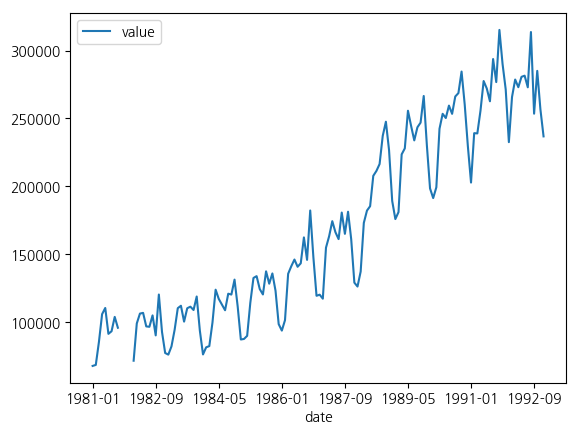

1981.10 ~ 1981.12에 결측치가 존재한다.


In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, acf, plot_pacf, pacf
dat.plot();
plt.show();
print("1981.10 ~ 1981.12에 결측치가 존재한다.")

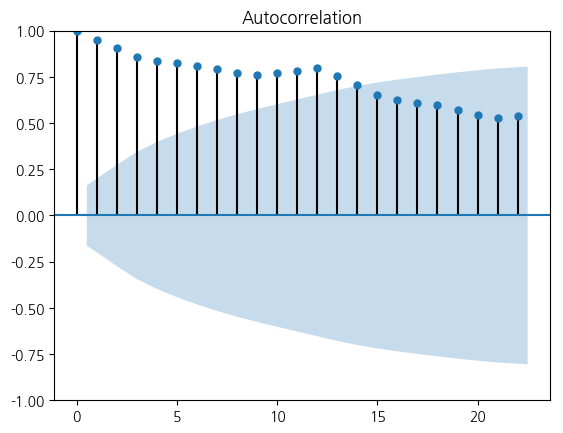

In [41]:
plot_acf(dat.value, missing = 'drop');
plt.show();

추세 그래프를 보면 시간이 지남에 따라 관광객 수가 증가하는 양의 추세가 확인할 수 있다. 또한, ACF가 천천히 감소하는 패턴을 보았을 때, 추세가 존재하는 것을 확인할 수 있다.

또한, 시간이 지남에 따라 분산이 증가하는 것으로 보이며, 분산 안정화 변환을 고려할 수 있다. 각 연도별 시계열 그래프를 보았을 때, 각 연도별로 비슷한 패턴이 반복되므로, 계절 추세가 존재한다.

2.  **결측치 확인 및 결측치를 대치하시오.**

훈련 데이터와 테스트 데이터를 분리한다.



In [42]:
TEST_SIZE = 12
train, test = dat.iloc[:-TEST_SIZE], dat.iloc[-TEST_SIZE:]
train.shape, test.shape

((132, 1), (12, 1))

In [43]:
train['value'] = train.value.interpolate(method='linear')

선형 외삽 방법을 통해 결측치를 대치한다. 선형 외삽은 결측치 주변 실제값 사이의 관계를 이용하므로 시계열의 경향성을 반영하여 결측치를 대치하는 장점이 있다.

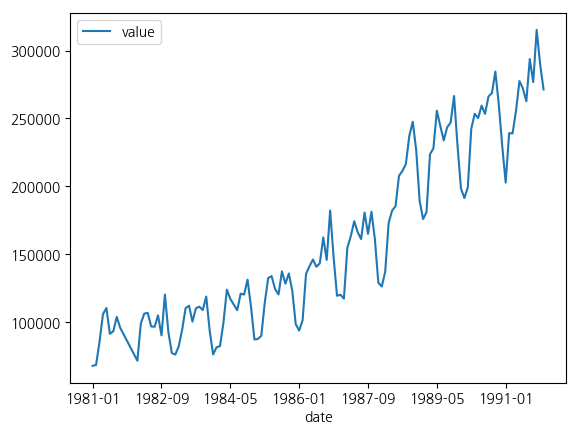

그림을 통해서 확인해본 결과, 시계열의 경향성을 반영하여 결측치가 대치된 것을 확인할 수 있다.


In [44]:
train.plot();
plt.show();
print("그림을 통해서 확인해본 결과, 시계열의 경향성을 반영하여 결측치가 대치된 것을 확인할 수 있다.")

3.  **계절성을 포함하는 시계열 모델을 구축하고 정확도 측면에서 제시하시오.**

시간에 따라 분산이 늘어나는 경향이 있으므로, 분산 안정화 변환을 실시한다.



In [45]:
from scipy import stats
lambda_result = stats.boxcox(train['value'])
print(lambda_result[1])

-0.2108815164230156


Box-Cox 변환을 위한 람다 값은 -0.21이므로, 0에 가깝기 때문에 로그 변환으로 대체한다.



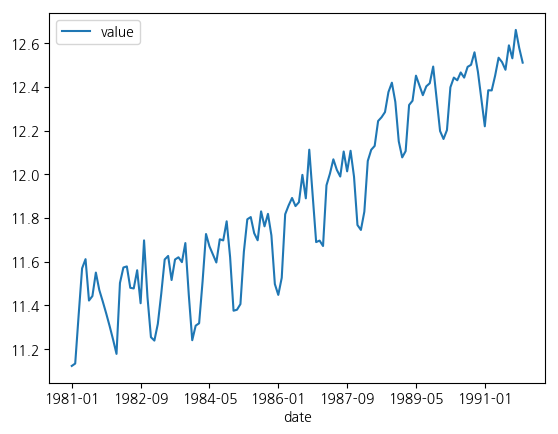

In [46]:
train['value'] = np.log(train['value'])
test['value'] = np.log(test['value'])
train.plot();
plt.show();

로그 변환 결과, 시간에 따라 분산이 일정하게 안정화된 것을 확인할 수 있다.

### d = 1일 때 (일반 차분)

추세와 계절성이 함께 존재하므로, 일반차분과 계절차분을 고려해볼 수 있다.

귀무가설 : 시계열 데이터는 추세 정상성을 따른다.

대립가설 : 시계열 데이터는 추세 정상성을 따르지 않는다.

In [47]:
from statsmodels.tsa.stattools import kpss
print('test statistic: %f' % kpss(train)[0])

test statistic: 1.933121


In [48]:
print('p-value: %f' % kpss(train)[1])
print('''
유의수준 0.05에서 p-value = 0.01로 작으므로, 귀무기설을 기각한다. 따라서 해당 시계열 데이터는 추세 정상성을 따르지 않는다. 일반차분을 실시한다.
''')

p-value: 0.010000

유의수준 0.05에서 p-value = 0.01로 작으므로, 귀무기설을 기각한다. 따라서 해당 시계열 데이터는 추세 정상성을 따르지 않는다. 일반차분을 실시한다.



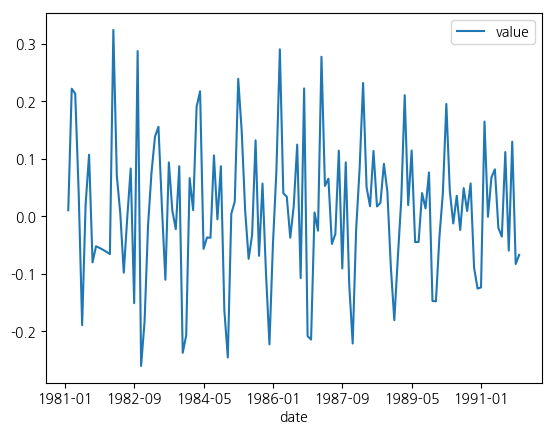

In [49]:
train_diff = train.diff()
train_diff.plot();
plt.show();

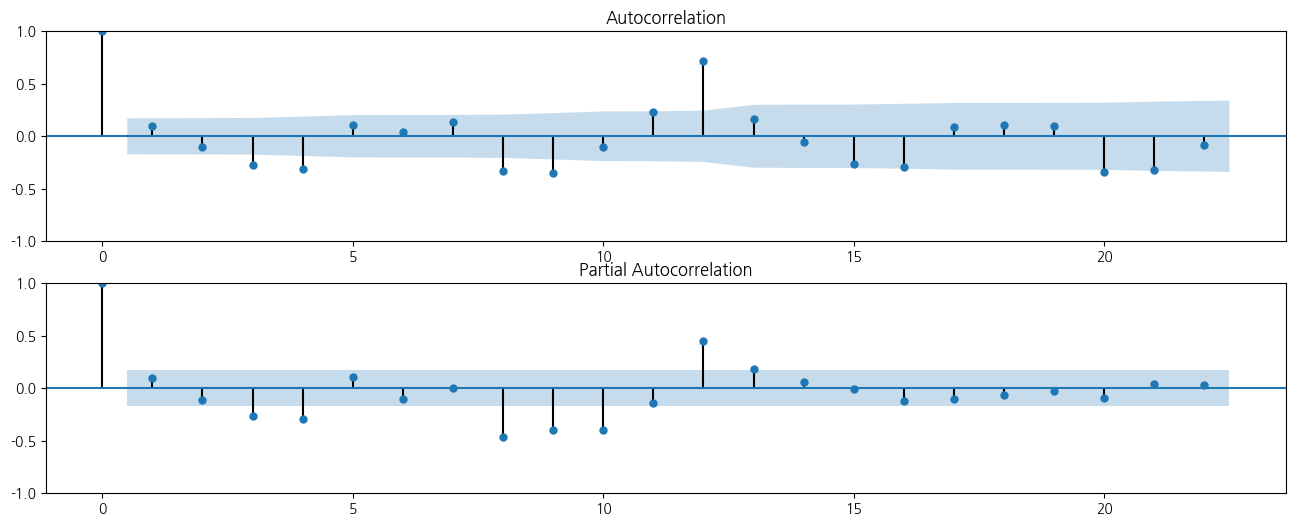

In [50]:
train_diff.dropna(inplace = True);
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,6));
plot_acf(train_diff['value'], ax = ax1);
plot_pacf(train_diff['value'], ax = ax2, method = 'ywm');
plt.show();

추세 그래프와 acf plot을 보면 12를 주기로 acf 값이 커지는 것을 볼 수 있다. 따라서 추가적으로 계절 차분을 고려한다.

### D = 1일 때 (계절 차분)

계절 차분을 통해 추세가 사라질 수 있으므로, 계절차분만 진행해본다.


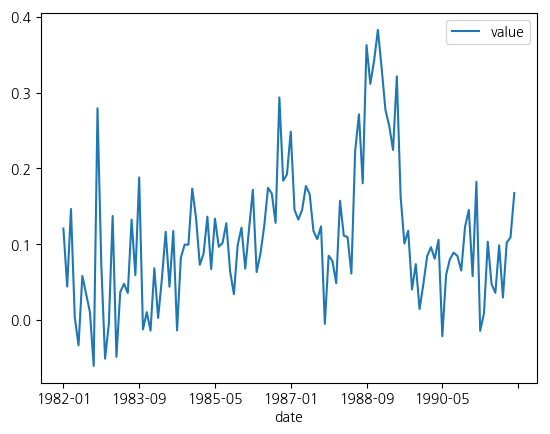

In [51]:
train_diff2 = train.diff(12)
train_diff2.dropna(inplace = True)
train_diff2.plot();
plt.show();

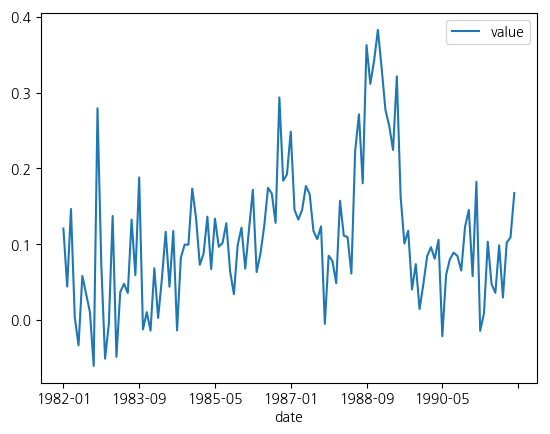

In [52]:
train_diff2.plot();
plt.show();

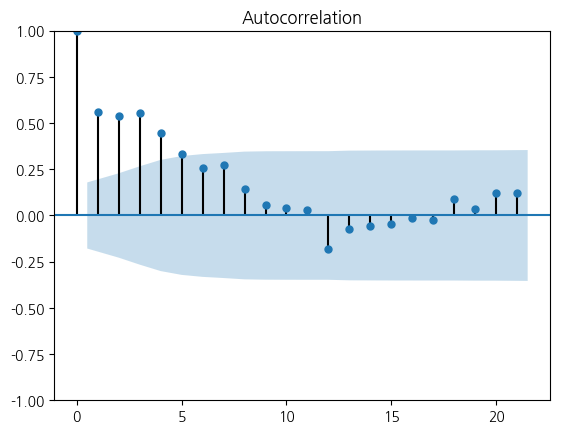

In [53]:
plot_acf(train_diff2['value'])
plt.show();

계절 차분 결과, 추세 그래프와 acf plot을 확인해보면 추세가 존재하고, acf가 천천히 감소하는 것을 확인할 수 있다. 추가적인 일반 차분을 고려한다.

### d = 1, D = 1일 때

일반 차분과 계절 차분을 동시에 고려한다.

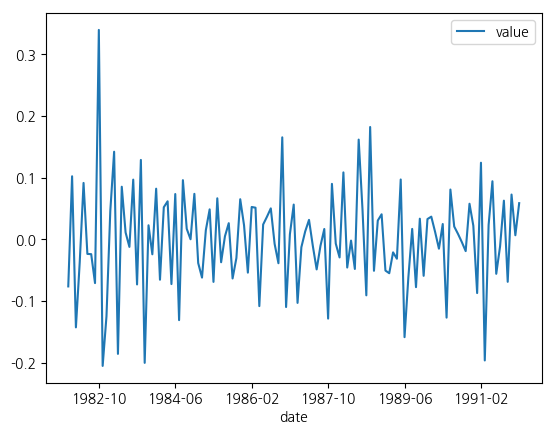

In [54]:
train_diff3 = train_diff.diff(12)
train_diff3.plot();
plt.show();

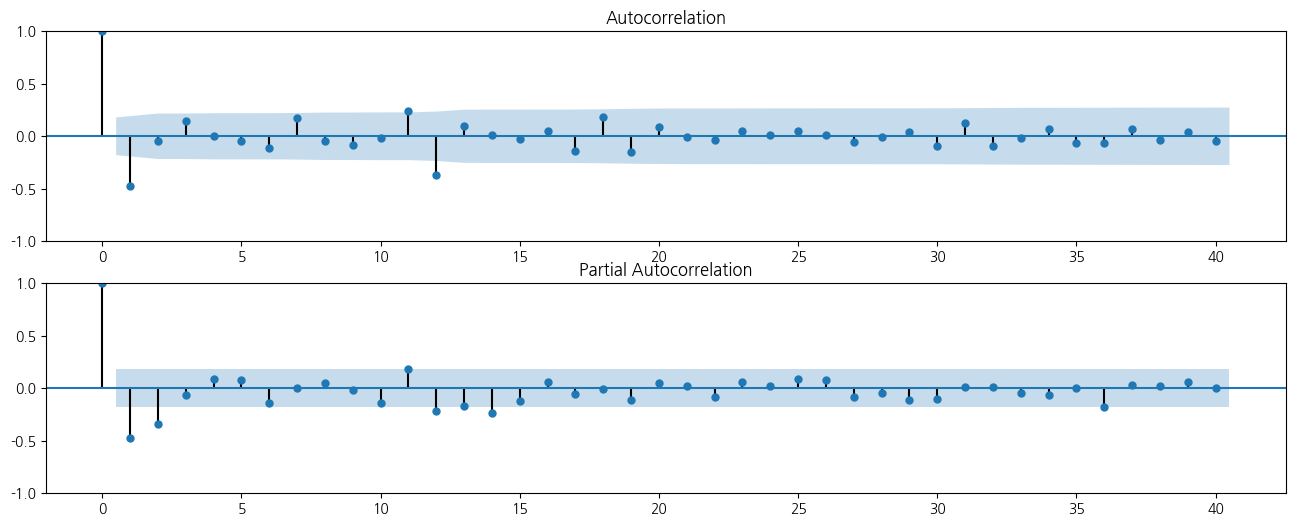

In [55]:
train_diff3.dropna(inplace = True)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,6));
plot_acf(train_diff3['value'], ax = ax1, lags = 40);
plot_pacf(train_diff3['value'], ax = ax2, method = 'ywm', lags = 40);
plt.show();

일반 추세가 사라졌으며, 계절성 또한 사라진 것을 볼 수 있다.

따라서 계절차분과 일반차분(d = 1, D = 1)을 동시에 고려한다.

모델 탐색을 위해 auto.arima를 활용한다. AIC를 기준으로 D = 1, d = 1, lambda = 0(로그 변환)일 때 최적 모델을 탐색한다.

In [56]:
import pmdarima as pm
model2 = pm.auto_arima(train, 
                   start_p=0, 
                   start_q=0,
                   max_p=5, 
                   max_q=5,
                   m=12,             
                   d=1,          
                   seasonal=True,   
                   start_P=0, 
                   D=1, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-282.638, Time=0.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-250.935, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-302.540, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-318.098, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-290.045, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-317.983, Time=0.54 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-317.830, Time=0.64 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-317.285, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-317.152, Time=1.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-316.294, Time=0.49 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-316.403, Time=0.34 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-305.334, Time=0.37 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-314.604, Time=0.72 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-316.410, Time=0.23 sec

Best model:  ARIMA

ARIMA(0,1,1)(0,1,1)[12] 를 최종 모형으로 선택한다. 모델에 대한 가정을 검토한다.

In [57]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(0,1,1), seasonal_order=(0, 1, 1, 12)).fit()
print(model.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            value   No. Observations:                  132
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 162.049
Date:                          Mon, 26 May 2025   AIC                           -318.098
Time:                                  08:04:16   BIC                           -309.761
Sample:                              01-01-1981   HQIC                          -314.712
                                   - 12-01-1991                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6036      0.080     -7.592      0.000      -0.759      -0.448
ma.S.L12      -0.5751      0.102     -5.655      0.

- 귀무 가설: 해당 계수는 0이다.
- 대립 가설: 해당 계수는 0이 아니다.

계수에 대한 신뢰구간을 확인해본 결과, 유의수준 5%에서 ma1, sma1 모두 신뢰구간에 0을 포함하지 않으므로, 귀무가설을 기각한다. 따라서 모든 계수가 통계적으로 유의하다.

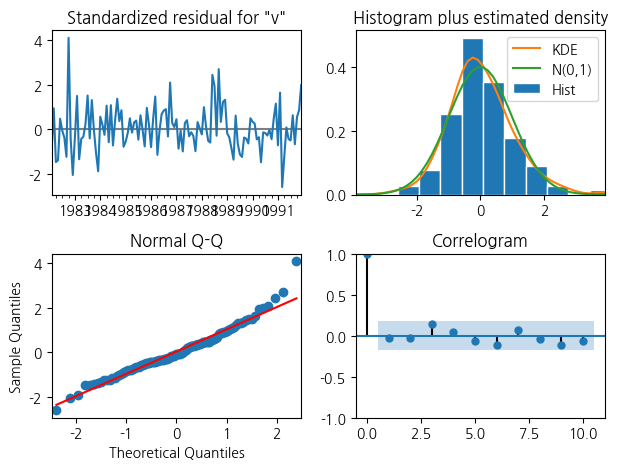

In [58]:
model.plot_diagnostics();
plt.tight_layout()
plt.show();

- 귀무가설 : 잔차 사이에 자기상관이 존재하지 않는다.
- 귀무가설 : 잔차 사이에 자기상관이 존재한다.

ljung box 테스트 결과 유의수준 0.05에서 p-value = 0.69로 크므로, 귀무가설을 기각할 수 없다. 따라서 잔차 사이에 자기상관이 존재하지 않는다.

잔차의 ACF 그래프를 보면 뚜렷한 분산 증가 감소 혹은 경향성이 없고, 0을 중심으로 무작위로 분포한다.

따라서 잔차는 백색잡음과정을 따른다고 볼 수 있다.

추가적으로 잔차의 분포를 확인했을 때, 근사적으로 정규분포의 형태를 띄므로, 오차의 정규성 가정을 만족한다고 할 수 있다.

### 실제값과 예측값 비교

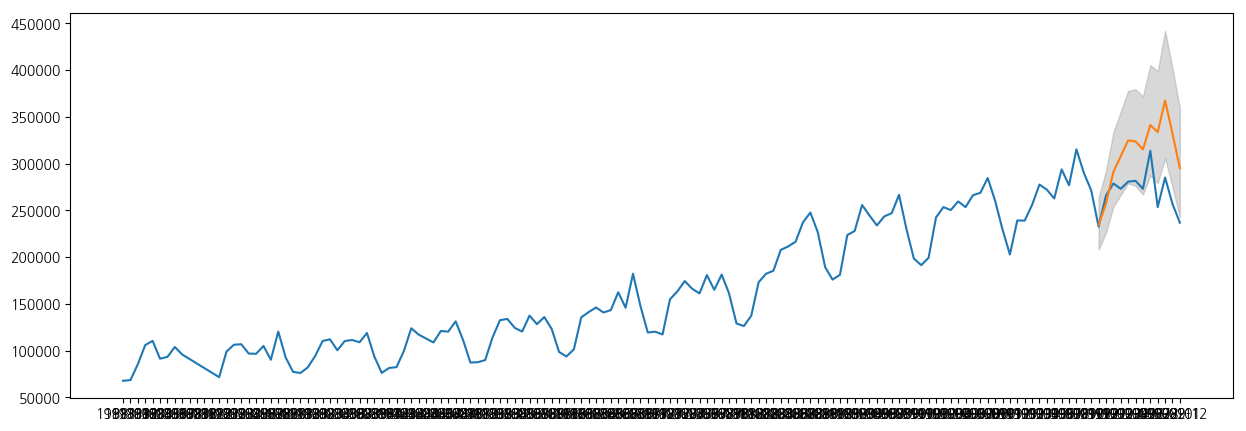

In [59]:
prediction, confint = model2.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction = np.exp(prediction)
confint = np.exp(confint)

train['value'] = np.exp(train['value'])
test['value'] = np.exp(test['value'])
full_dat = pd.concat([train, test], axis = 0)

cf = pd.DataFrame(confint)
prediction_series = pd.Series(prediction,index=test.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5));

ax.plot(full_dat.value);
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3);
#plt.xticks(rotation=45);
plt.show();

### 예측 성능 확인

훈련 데이터와 테스트 데이터의 모델 성능은 다음과 같다.

In [60]:
def MASE(training_series, testing_series, prediction_series):

    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

MASE(train['value'].to_numpy(), test['value'].to_numpy(), prediction.to_numpy())

3.053452648188356

4.  **업무에 적용할 수 있는지, 판단근거와 함께 서술하시오.**

ASE 지표를 통해 업무에 적용할 수 있는지 판단한다. MASE가 1보다 크다는 의미는 학습 데이터에서의 naive forecast보다 모형에서의 오차가 더 크다고 볼 수 있다. 테스트 데이터를 MASE=3.05로 1보다 크므로, 새로운 데이터가 들어왔을 때, 모델 성능이 매우 떨어진다. 따라서 해당 모형을 이용하는 것은 적절하지 않고, 대안 모형을 활용해야 한다. LSTM, prophet 등 다른 시계열 모형을 대안으로 고려해볼 수 있다.

## 문제 3(변형 문제)

**별도의 데이터 없음**

돈돈이는 사회학 연구소에서 연구원으로 일하고 있습니다. 그는 직업 만족도가 사람들의 수입 수준에 따라 어떻게 달라지는지 궁금했습니다. 이를 위해 도시에서 일하는 96명의 사람들을 대상으로 설문조사를 진행했습니다. 설문조사에서는 응답자들의 수입과 직업 만족도에 대해 물어보았고, 그 결과는 다음과 같았습니다.

|                   |                      |                 |               |               |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| 수입\\직업만족도  | **VD (매우 불만족)** | LD(조금 불만족) | MS(조금 만족) | VS(매우 만족) |
|   **\<15,000**    |          1           |        3        |      10       |       6       |
| **15,000-25,000** |          2           |        3        |      10       |       7       |
| **25,000-40,000** |          1           |        6        |      14       |      12       |
|   **\>40,000**    |          0           |        1        |       9       |      11       |


1.  **수입 수준과 직업 만족도 간의 순위 관계를 파악하기 위해 Goodman and Kruskal의 Gamma 계수를 계산하시오.**

In [61]:
data = {
    "수입": ["<15,000", "15,000-25,000", "25,000-40,000", ">40,000"],
    "VD": [1, 2, 1, 0],      # 매우 불만족
    "LD": [3, 3, 6, 1],      # 조금 불만족
    "MS": [10, 10, 14, 9],   # 조금 만족
    "VS": [6, 7, 12, 11]     # 매우 만족
}

df = pd.DataFrame(data)

In [62]:
melted_df = pd.melt(df, id_vars=["수입"], var_name="만족도", value_name="빈도")
x_vector = melted_df['수입'].repeat(melted_df['빈도']).values
y_vector = melted_df['만족도'].repeat(melted_df['빈도']).values

In [63]:
income_mapping = {
    "<15,000": 1,
    "15,000-25,000": 2,
    "25,000-40,000": 3,
    ">40,000": 4
}

satisfaction_mapping = {
    "VD": 1,  # 매우 불만족
    "LD": 2,  # 조금 불만족
    "MS": 3,  # 조금 만족
    "VS": 4   # 매우 만족
}

In [64]:
x_vector_numeric = pd.Series(x_vector).map(income_mapping).values
y_vector_numeric = pd.Series(y_vector).map(satisfaction_mapping).values
print(x_vector_numeric)

[1 2 2 3 1 1 1 2 2 2 3 3 3 3 3 3 4 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4]


In [65]:
print(y_vector_numeric)

[1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [66]:
from pymcdm.correlations import goodman_kruskal_gamma
goodman_kruskal_gamma(x_vector_numeric, y_vector_numeric)

0.22110091743119267

Gamma= 0.221로 약한 양의 순서 관계가 존재한다.

2.  **5% 유의수준
에서 가설 검증에 대한 검정통계량을 계산하시오. (단, 반올림하여 소수점 셋째 자리까지 표시하시오.) 연구가설의 채택여부를 결정하시오.**


- 귀무가설 : 두 변수 간에는 순서 관계가 없다(Gamma=0)
- 대립가설 : 두 변수 간에는 순서 관계가 있다((Gamma!=0)

유의수준 0.05에서 p-value = 0.06으로 크므로, 귀무가설을 기각할 수 없다. 따라서 두 변수 간에는 순서 관계가 없다고 결론지을 수 있다.


## 문제 4

**별도의 데이터 없음**

슬통 전구회사는 자사의 제품 생산 라인에서 최근 불량률이 급증했다는 내부 보고서를 받았습니다. 초기 보고서에 따르면 불량률이 약 9%에 달한다고 합니다. 회사의 경영진은 이를 확인하기 위해 독립적인 품질 검사팀에 조사를 의뢰하였습니다. 검사팀은 신뢰도 95%로 불량률을 확인하기 위해 필요한 표본 크기를 계산하고자 합니다. 오차한계가 3% 내외로 허용된다면, 검사팀은 최소 몇 개의 제품을 표본으로 선택해야 하는지 계산하시오.

In [67]:
Z = 1.96  # 신뢰도 95%에 해당하는 z값
p = 0.09  # 추정 불량률
E = 0.03  # 오차한계

n = (Z**2 * p * (1 - p)) / (E**2)

sample_size = np.ceil(n)

print(int(sample_size))

350




## 문제 5(변형 문제)

**별도의 데이터 없음**

돈돈이는 사회학을 공부하는 대학생으로, 학력 수준에 따라 사람들이 어떤 종교적 신념을 가지고 있는지 궁금해졌습니다. 이를 알아보기 위해, 도시에서 일하는 2726명의 사람들을 대상으로 설문조사를 진행했습니다. 설문조사 응답 결과를 정리한 자료는 다음과 같습니다.

| 학위\\종교적 믿음 | 원리주의자 | 중도 | 원칙주의자 |
|-------------------|------------|------|------------|
| 고졸              | 178        | 138  | 108        |
| 전문대졸          | 570        | 648  | 442        |
| 대졸              | 138        | 252  | 252        |



1.  **5% 유의수준에서 가설 검증에 대한 검정통계량을 계산하시오. (단, 반올림하여 소수점 셋째 자리까지 표시하시오.) 연구가설의 채택여부를 결정하시오.**

- 귀무가설: 학력 수준과 종교적 믿음은 독립이다.
- 대립가설: 학력 수준과 종교적 믿음은 독립이 아니다.

In [68]:
from scipy.stats import chi2_contingency

tt = np.array([[178, 138, 108],
               [570, 648, 442],
               [138, 252, 252]])
               
chi2, p, dof, expected = chi2_contingency(tt)

print("Chi-squared:", chi2)
print("p-value:", p)
print('''
검정 통계량은 69.157이다. 
유의수준 5%에서 p-value = 3.42e-14로 작으므로, 귀무가설을 기각한다. 
따라서 학력과 종교적 믿음은 독립이 아니다.
''')

Chi-squared: 69.15675936513162
p-value: 3.419689510099415e-14

검정 통계량은 69.157이다. 
유의수준 5%에서 p-value = 3.42e-14로 작으므로, 귀무가설을 기각한다. 
따라서 학력과 종교적 믿음은 독립이 아니다.



2.  **검정 결과에 대한 잔차분석을 수행하고, 해석하시오.**

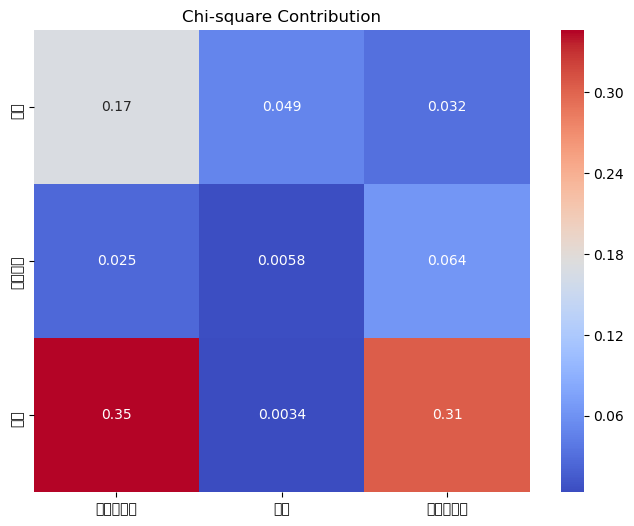


종교적 믿음이 원리주의자인 경우 학력은 고졸, 대졸일 때 연관성이 존재한다. 
종교적 믿음이 원칙주의자인 경우 학력은 대졸일 때 연관성이 존재한다.



In [69]:
residuals = (tt - expected) / np.sqrt(expected)
contrib = residuals**2 / chi2
from matplotlib import font_manager, rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8, 6));
sns.heatmap(contrib, annot=True, cmap="coolwarm", cbar=True,
            xticklabels=["원리주의자", "중도", "원칙주의자"],
            yticklabels=["고졸", "전문대졸", "대졸"]);
plt.title('Chi-square Contribution');
plt.show();
print('''
종교적 믿음이 원리주의자인 경우 학력은 고졸, 대졸일 때 연관성이 존재한다. 
종교적 믿음이 원칙주의자인 경우 학력은 대졸일 때 연관성이 존재한다.
''')



## 문제 6

슬통 초등학교에서는 학생들의 건강 관리를 위해 일부 학생들의 혈압을 측정하였습니다. 총 25명의 학생 중 남학생은 16명, 여학생은 9명이었습니다. 학교 건강 관리팀은 남학생과 여학생 사이에 평균 혈압이 차이가 있는지 궁금해하였고, 이를 확인하기 위해 5%의 유의수준에서 검정하려 합니다. (단, 남녀 학생의 혈압이 정규분포를 따르며, 두 집단의 분산이 동일하다고 가정합니다.)

In [70]:
df = pd.read_csv('problem6.csv')
df.head()

,No.,남학생,여학생
0,1,124.97,114.87
1,2,118.62,128.14
2,3,126.48,115.92
3,4,135.23,110.88
4,5,117.66,139.66


1)  **연구가설과 귀무가설 작성하시오.**


- 귀무가설 : 남학생과 여학생의 평균 협압은 차이가 없다.
- 대립가설 : 남학생과 여학생의 평균 협압은 차이가 있다.


2)  **가설검증에 대한 검정통계량을 계산하고, 연구가설의 채택여부를 설명하시오.**

In [71]:
from scipy import stats

aa = df['남학생']
bb = df['여학생'].dropna()

t_stat, p_value = stats.ttest_ind(aa, bb, equal_var=True)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print('''
유의수준 5%에서 p-value = 0.7732로 크므로, 귀무가설을 기각할 수 없다. 
따라서 남학생과 여학생의 평균 협압은 차이가 없다.
''')


T-statistic: -0.2916437301483526
P-value: 0.7731732568629174

유의수준 5%에서 p-value = 0.7732로 크므로, 귀무가설을 기각할 수 없다. 
따라서 남학생과 여학생의 평균 협압은 차이가 없다.



3)  **가설검정에 대한 신뢰구간을 계산하고, 계산된 신뢰구간이 어떻게 2의 결과를 지지하는지 설명하시오.\
    (단, 신뢰구간 계산시 다음의 값을 사용하시오.)**

-   $t_{23,0.025} = 2.069$

In [72]:
n1 = len(aa)
n2 = len(bb)

mean1 = np.mean(aa)
mean2 = np.mean(bb)

std1 = np.std(aa, ddof=1)
std2 = np.std(bb, ddof=1)

sp = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

t_value = 2.069  # 예시로 주어진 t 값

se = sp * np.sqrt(1/n1 + 1/n2)

lower_bound = (mean1 - mean2) - t_value * se
upper_bound = (mean1 - mean2) + t_value * se

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: -9.423643960076621
Upper bound: 7.095171737854404
